In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data

,t,distance-camera,distance-t265-clear,TRUE,distance-t265-noise,Unnamed: 5,0.5,Unnamed: 7,Unnamed: 8
0,1.0,2.683767,0.801695,3.1,0.832332,NaN,0.5,y=3.1t,(1 + scale_factor*(RAND()-0.5))
1,2.0,4.808946,2.585699,6.2,2.493579,NaN,0.5,NaN,NaN
2,3.0,7.029511,4.740469,9.3,4.864577,NaN,0.5,NaN,NaN
3,4.0,10.359745,7.136015,12.4,7.034139,NaN,0.5,NaN,NaN
4,5.0,15.661936,9.710601,15.5,9.805241,NaN,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN


In [ ]:
dataN = data.iloc[:80]

In [ ]:
dataN

,t,distance-camera,distance-t265-clear,TRUE,distance-t265-noise,Unnamed: 5,0.5,Unnamed: 7,Unnamed: 8
0,1.0,2.683767,0.801695,3.1,0.832332,NaN,0.5,y=3.1t,(1 + scale_factor*(RAND()-0.5))
1,2.0,4.808946,2.585699,6.2,2.493579,NaN,0.5,NaN,NaN
2,3.0,7.029511,4.740469,9.3,4.864577,NaN,0.5,NaN,NaN
3,4.0,10.359745,7.136015,12.4,7.034139,NaN,0.5,NaN,NaN
4,5.0,15.661936,9.710601,15.5,9.805241,NaN,0.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75,76.0,212.810695,294.149736,235.6,294.526037,NaN,0.5,NaN,NaN
76,77.0,208.845612,298.733354,238.7,299.804503,NaN,0.5,NaN,NaN
77,78.0,181.944821,303.326175,241.8,316.848530,NaN,0.5,NaN,NaN
78,79.0,237.162417,307.928081,244.9,310.332924,NaN,0.5,NaN,NaN


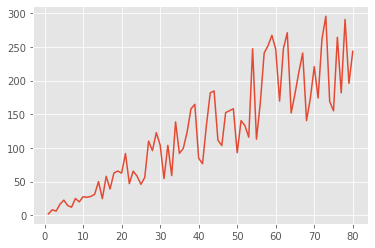

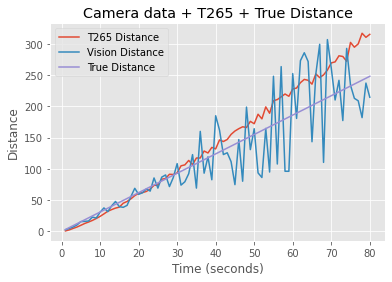

In [ ]:
plt.plot(dataN['t'],dataN['distance-t265-noise'],label = 'T265 Distance')
plt.plot(dataN['t'],dataN['distance-camera'], label = 'Vision Distance')
plt.plot(dataN['t'],dataN['TRUE'], label = 'True Distance')

plt.xlabel("Time (seconds)")
plt.ylabel('Distance')
plt.title("Camera data + T265 + True Distance")
plt.legend()

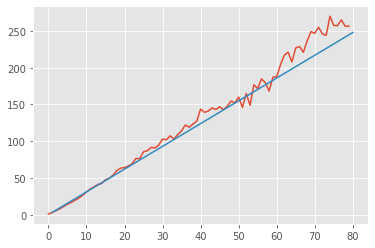

In [ ]:
class kalmanFilter:
  def __init__(self, Q, R ):
    self.x = 0 # your initial state
    self.Q = Q # your model covariance
    self.R = R # your sensor covariance
    self.p = 1 # your initial covariance guess
    self.K = 1 # your initial kalman gain guess
    self.x_previous = self.x
    self.p_previous = self.p
    self.u = 0
    self.z = 0
  def update(self,z,u):
    self.x += u
    self.p += self.Q
    self.K = self.p/(self.p + self.R)
    self.x = self.x + self.K * (z - self.x)
    self.p = (1-self.K) * self.p
    return self.x
basedKf = kalmanFilter(0.1, 9)
newMeasurements = []
previousMeasurement = 0
for i in range(len(dataN)):
  current = dataN['distance-t265-noise'][i]
  thing = current - previousMeasurement
  newMeasurements.append(basedKf.update(dataN['distance-camera'][i],thing))
  previousMeasurement = current 
plt.plot(newMeasurements)
plt.plot(dataN['t'],dataN['TRUE'], label = 'True Distance')


In [ ]:
bestQ = 0
bestR = 0
bestCost = 100000000000000000
bestData = []
def rmse(firstArray, secondArray):
  n = len(firstArray)
  
  squaredSumDifference = 0
  for i in range(n):
    squaredSumDifference += (firstArray[i] - secondArray[i]) ** 2

  squaredSumDifference /= n 

  squaredSumDifference **= 0.5

  return squaredSumDifference

for r in np.arange (0, 20, 0.01):
  for q in np.arange (0, 1, 0.01):
    basedKf = kalmanFilter(q, r)
    newMeasurements = []
    previousMeasurement = 0
    for i in range(len(dataN)):
      current = dataN['distance-t265-noise'][i]
      thing = current - previousMeasurement
      newMeasurements.append(basedKf.update(dataN['distance-camera'][i],thing))
      previousMeasurement = current
    cost = rmse(newMeasurements, dataN['TRUE'])
    if cost < bestCost:
      bestCost = cost
      bestQ = q
      bestR = r
      bestData = newMeasurements

print(f"best cost was {bestCost} best Q was {bestQ} and best R was {bestR}")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


best cost was 30.141998619254128 best Q was 0.9500000000000001 and best R was 0.02


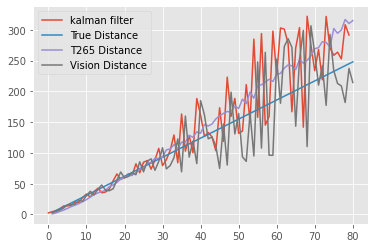

In [ ]:
plt.plot(newMeasurements, label = 'kalman filter')

plt.plot(dataN['t'],dataN['distance-t265-noise'],label = 'T265 Distance')
plt.plot(dataN['t'],dataN['distance-camera'], label = 'Vision Distance')
plt.plot(dataN['t'],dataN['TRUE'], label = 'True Distance')
plt.legend()